In [9]:
import os
import glob
import pandas as pd
import numpy as np
from nilearn.input_data import NiftiMasker
from nilearn.image import load_img
from nilearn.masking import apply_mask

In [10]:
# Settings
#data_dir = '/SCRATCH/users/alexandresayal/BIDS-BRAINPLAYBACK-TASK2/'
data_dir = '/Volumes/T7/BIDS-BRAINPLAYBACK-TASK2/'
space_label = "MNI152NLin2009cAsym"
derivatives_folder = "derivatives/fmriprep23"
task_label = "02a"
out_dir = os.path.join(data_dir,"derivatives","nilearn_glm")
out_dir_group = os.path.join(data_dir,"derivatives","nilearn_glm","group")
group_fig_dir = os.path.join(data_dir,"derivatives","nilearn_glm","group_figures")
group_tab_dir = os.path.join(data_dir,"derivatives","nilearn_glm","group_tables")
group_roi_dir = os.path.join(data_dir,"derivatives","nilearn_glm","group_rois")

In [11]:
# subject list
subject_list = [os.path.basename(x) for x in glob.glob(os.path.join(data_dir,"sub-*"))]
subject_list.sort()
subject_list

['sub-01',
 'sub-02',
 'sub-03',
 'sub-04',
 'sub-05',
 'sub-06',
 'sub-07',
 'sub-08',
 'sub-09',
 'sub-10',
 'sub-11',
 'sub-12',
 'sub-13']

In [12]:
contrasts_renamed = ['All',
                     'JoyfulActivation', 'Nostalgia', 'Peacefulness', 'Power', 'Sadness', 'Tenderness', 'Tension', 'Transcendence', 'Wonder',
                     'Sublimity', 'Vitality', 'Unease', 'SublimityMinusVitality', 'VitalityMinusUnease', 'UneaseMinusSublimity']

In [13]:
# find rois in group_roi_dir - the .nii.gz files start with 'mask_'
roi_files = glob.glob(os.path.join(group_roi_dir, 'mask_*.nii.gz'))
roi_files

# create roi_labels from roi_files
roi_labels = [os.path.basename(roi_file).replace('mask_','').replace('.nii.gz','') for roi_file in roi_files]
roi_labels


['clusterid-1',
 'clusterid-2',
 'clusterid-3',
 'clusterid-4',
 'clusterid-5',
 'clusterid-6',
 'clusterid-7',
 'clusterid-8',
 'clusterid-9',
 'clusterid-10']

In [14]:
# extract z value from ROIs

# create a data frame of the z values for each ROI and each contrast
df = pd.DataFrame(columns=['ROI', 'Contrast', 'z_value'])

for rr in range(len(roi_files)):

    roi_path = roi_files[rr]

    for cc in range(len(contrasts_renamed)):

        map_path = os.path.join(out_dir_group,f'group_task-02a_stat-z_con-{contrasts_renamed[cc]}.nii.gz')

        z_val = np.mean(apply_mask(map_path, roi_path))

        df.loc[len(df)] = [roi_labels[rr], contrasts_renamed[cc], z_val]   

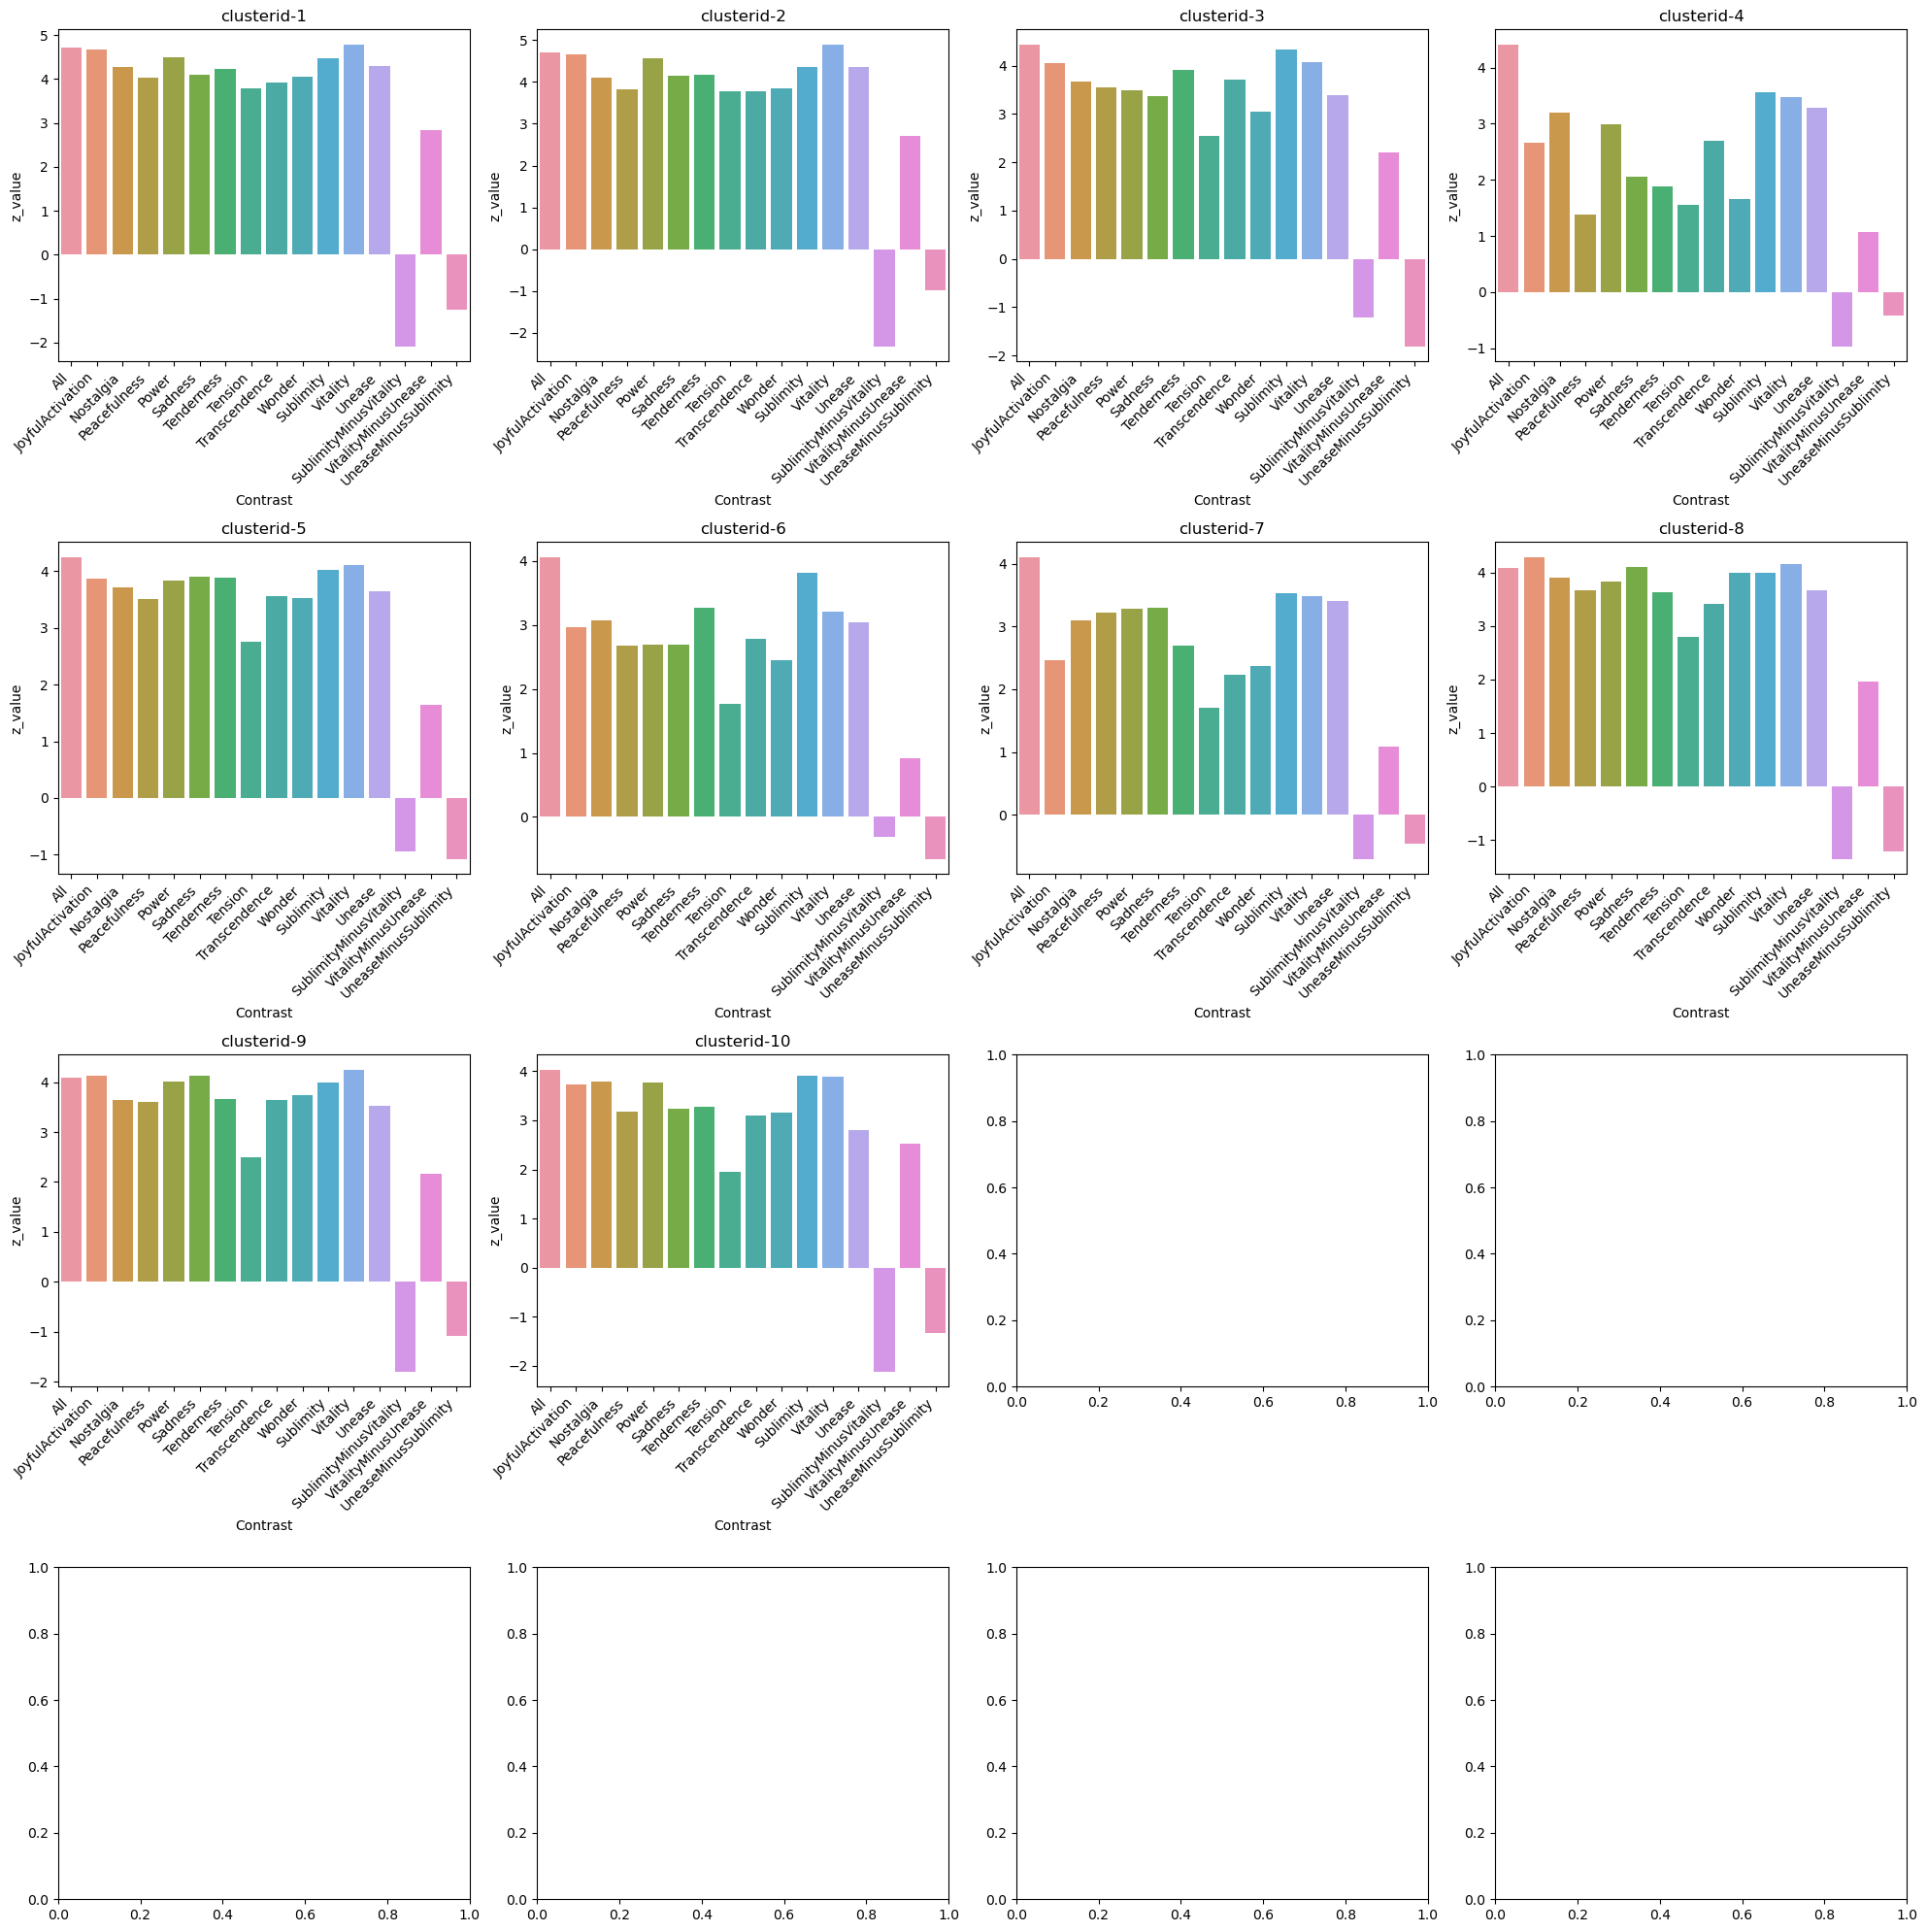

In [15]:
# create subplot for all ROIs to show barplots with the z values per condition
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(4, 4, figsize=(20, 20))

for rr in range(len(roi_files)):
    sns.barplot(x='Contrast', y='z_value', data=df[df['ROI']==roi_labels[rr]], ax=ax[rr//4, rr%4])
    ax[rr//4, rr%4].set_title(roi_labels[rr])
    ax[rr//4, rr%4].set_xticklabels(ax[rr//4, rr%4].get_xticklabels(), rotation=45, ha='right')

plt.tight_layout()


In [23]:
# extract z value from ROIs per subject

# create a data frame of the z values for each ROI and each contrast
df_ss = pd.DataFrame(columns=['ROI', 'contrast', 'subject', 'z_value'])

for rr in range(len(roi_files)):

    roi_path = roi_files[rr]

    for cc in range(len(contrasts_renamed)):

        for sub in range(len(subject_list)):

            map_path = os.path.join(out_dir,f'{subject_list[sub]}_task-02a_stat-z_con-{contrasts_renamed[cc]}.nii.gz')

            z_val = np.mean(apply_mask(map_path, roi_path))

            df_ss.loc[len(df_ss)] = [roi_labels[rr], contrasts_renamed[cc], subject_list[sub], z_val]   

In [24]:
df_ss.shape

(2080, 4)

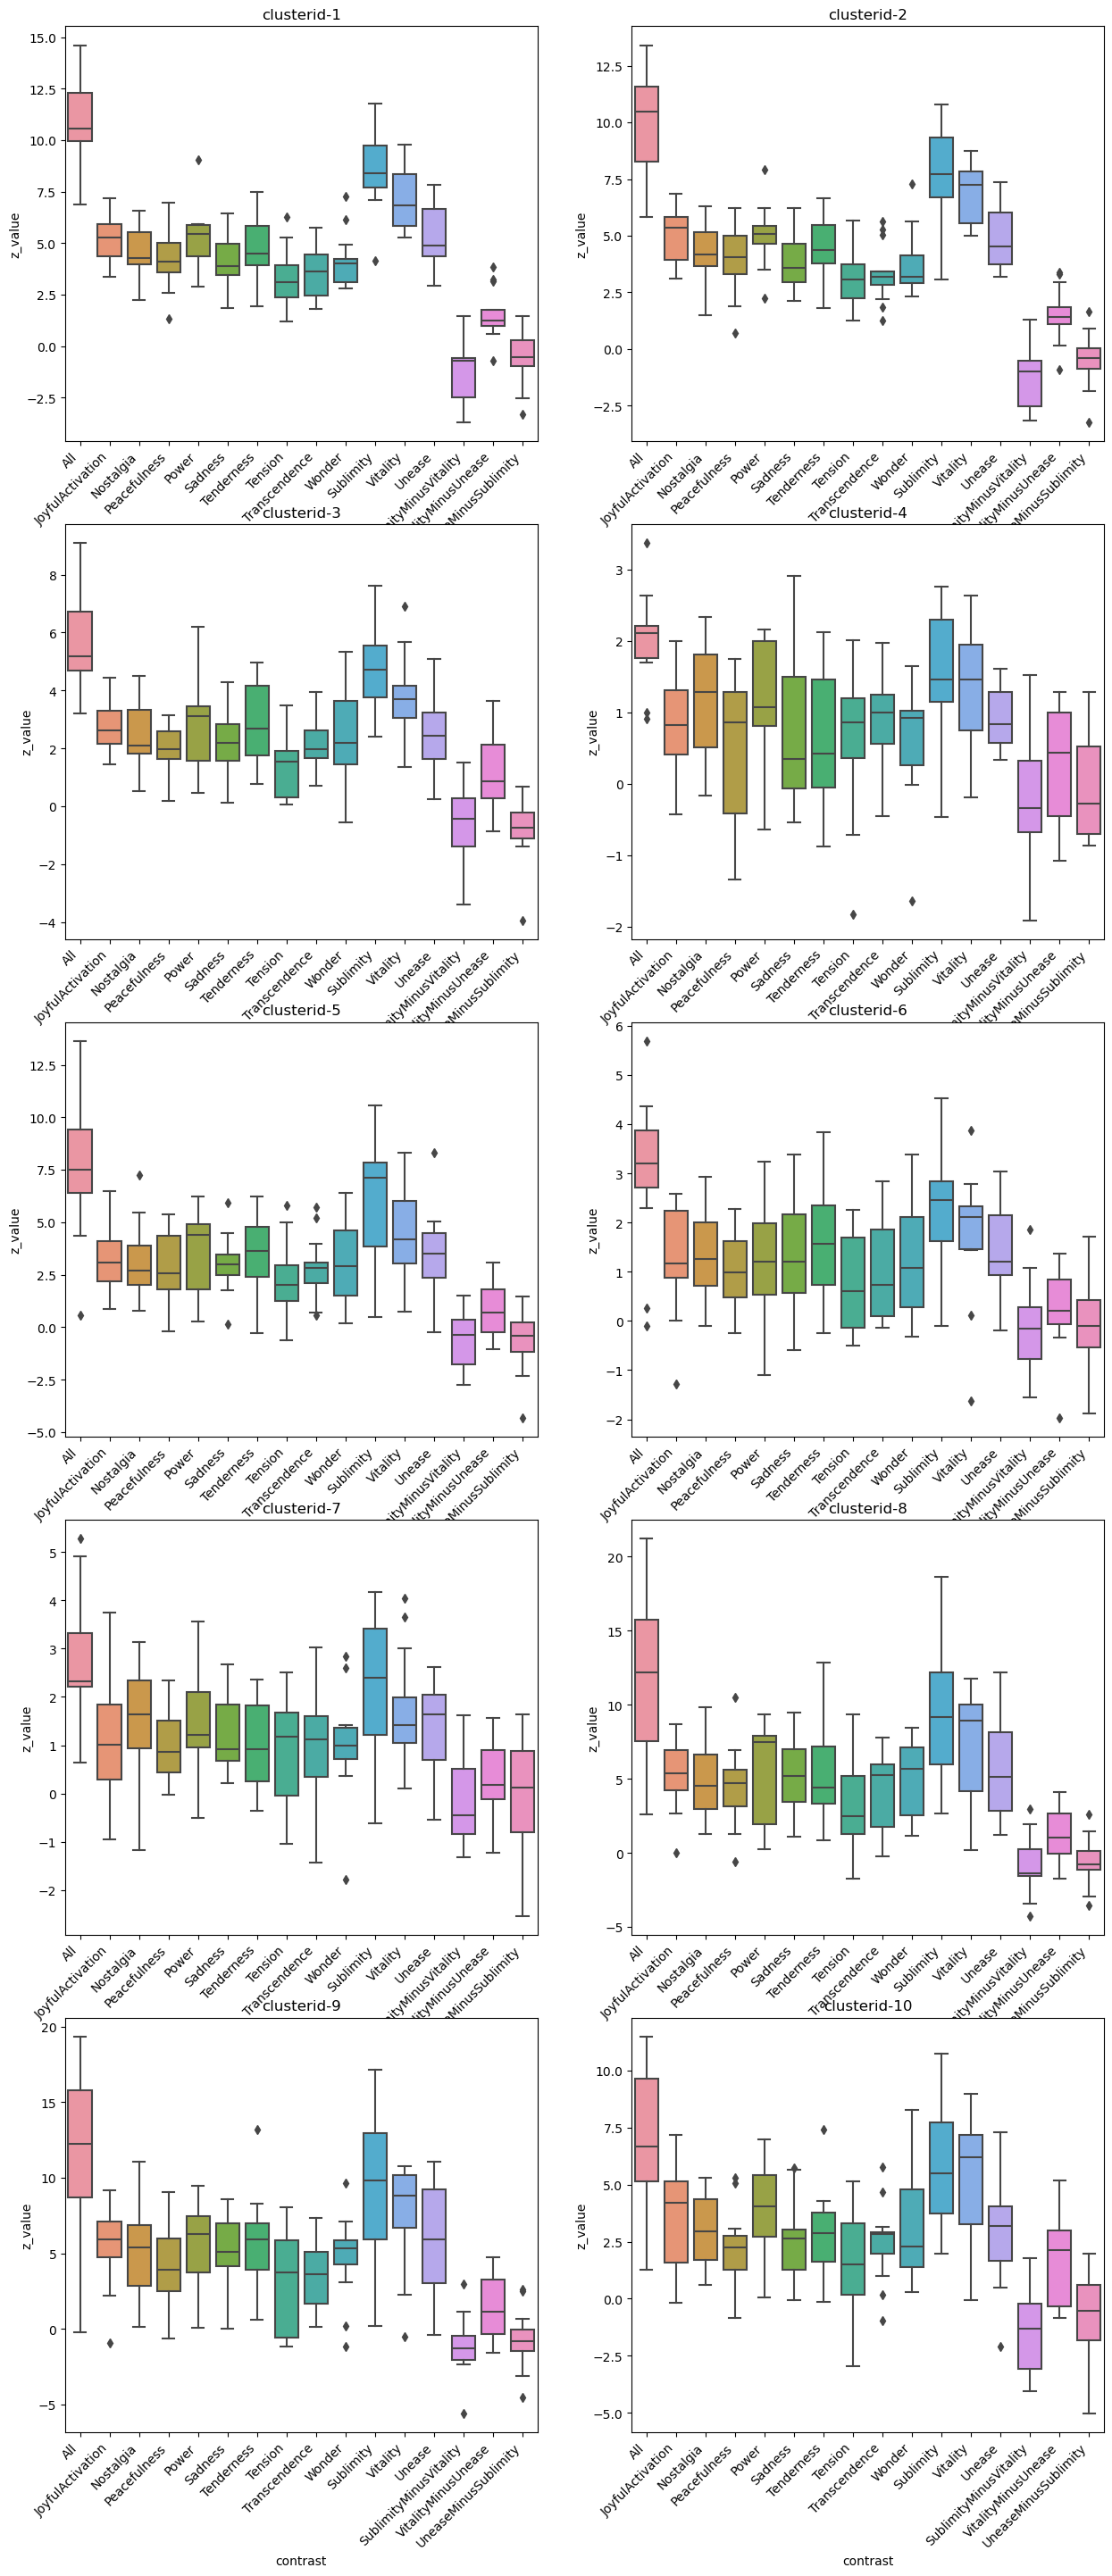

In [37]:
# create subplot for all ROIs to show boxplot with the z values per condition for all subjects
fig, ax = plt.subplots(5, 2, figsize=(15, 35))

for rr in range(len(roi_files)):
    sns.boxplot(x='contrast', y='z_value', data=df_ss[df_ss['ROI']==roi_labels[rr]], ax=ax[rr//2, rr%2])
    ax[rr//2, rr%2].set_title(roi_labels[rr])
    ax[rr//2, rr%2].set_xticklabels(ax[rr//2, rr%2].get_xticklabels(), rotation=45, ha='right')
